<img src="dsci512_header.png" width="600">

# Lecture 1

Outline:

- High level course intro (5 min)
- Code demos (10 min)
- Time complexity (10 min)
- Big O notation (10 min)
- Break (5 min)
- Example Big O analysis (10 min)
- Visualizing time complexities (5 min)
- Lower order terms (10 min)
- Big O with two variables (5 min)
- Worst/best/average cases (5 min, time-permitting)
- Space complexity (10 min)

## Lecture learning objectives

- Given code, determine the time and space complexity using Big-O notation.
- Classify an algorithm into one of the common complexity classes (e.g. constant, logarithmic, linear, quadratic, etc.).
- Contrast time and space complexity.
- Measure the amount of time code in Python takes using `timeit` or the `time` library.
- Maintain an awareness that choosing a good algorithm matters, sometimes _a lot_!

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

## High-level course intro (5 min)

Course goals:

- "Classic" undergraduate algorithms and data structures
  - Extremely compressed, a subset of topics
  - No time to go in depth
- What to do if your code is too slow
  - Python-specific

Course format:

- "Traditional lectures" in lecture time
- Activities in lab time
- Like worksheets but not handed in, not done during lecture time
- Complication
  - Wednesday lab is before Thursday lecture
  - So we may just do Wednesday lecture activities, leave the rest for you to do later
- Why?
  - There's a lot to cover
  - It's fun to run code live together in class

**Note:** this lecture is meant to be run in a Jupyter notebook. Part of the experience is that some cells take longer to run than others. Simply reading the notebook will not make sense.

## Code demos (15 min)

#### Demo 1: searching (list vs. set)

- Common problem: is a certain value present in a collection of items?

In [4]:
n = 10_000_000
x = list(range(n))
x[:20]  # first 20 items

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
-1 in x

False

In [5]:
%timeit (-1 in x)

68 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
x = set(range(n))

In [8]:
-1 in x

False

In [9]:
%timeit (-1 in x)

19 ns ± 0.0183 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


Questions we'll answer in this course:

- How could I have predicted this outcome?
- What if I double the size of $n$: how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

**Note:** we were cheating a little bit, because _creating_ the set takes longer than creating the list. However, as we can see, it's still fast.

#### Demo 2: sorting (selection vs. quick)

Aside: min vs. argmin

In [10]:
x = [4.2, 98.2, 9.0, 0.1, 30, 2.5, 2.6]

In [11]:
min(x)  # Python min

0.1

In [12]:
np.min(x)  # Numpy min: generally better if working with Numpy arays

0.1

In [13]:
np.argmin(x)

3

In [14]:
x[3]

0.1

Above: `np.argmin` gives us the _index of_ the smallest value.

Now, back to the demo.

In [15]:
n = 20_000
x = list(range(n))

In [16]:
np.random.shuffle(x)

In [17]:
x[:10]

[15017, 11124, 4714, 5860, 14661, 7278, 7302, 14387, 11264, 1453]

In [18]:
for i in range(n):
    min_ind = np.argmin(x[i:]) + i
    x[i], x[min_ind] = x[min_ind], x[i] # swap

In [19]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
np.random.shuffle(x)

In [21]:
x[:10]

[7224, 12234, 1900, 15390, 13945, 16693, 14212, 8788, 11121, 1531]

In [22]:
x.sort()

In [23]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Questions we'll answer in this course:

- How could I have predicted this outcome?
- What if I double the size of $n$, how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

#### Demo 3: batch operations (loop vs. vectorized)

In [24]:
n = 10_000_000
x = np.random.rand(n)
y = np.zeros(n)

In [26]:
x.shape

(10000000,)

In [27]:
y.shape

(10000000,)

In [28]:
x[:10]

array([0.7909464 , 0.56987904, 0.5563684 , 0.24255512, 0.69254233,
       0.24935415, 0.84464607, 0.28442488, 0.8191846 , 0.8246797 ])

In [29]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
for i in range(n):
    y[i] = x[i] * 2

In [31]:
x = np.random.rand(n)
y = np.zeros(n)

In [32]:
y = x * 2

Questions we'll answer in this course:

- How could I have predicted this outcome?
- What if I double the size of $n$, how much slower will the code be in each case? (Quantitative analysis)
- Why did this happen? (not in detail)

## Time complexity (10 min)

- We'll focus on the 2nd question about: how does the runtime change as a function of $n$?
- For now, let's ask ourselves: "if we double $n$, what happens to the number of steps?"

#### Examples from the above demos

For each of the following, what happens to the runtime if we double $n$?

**Operation:** Finding whether a number is in a list.
<br><br><br><br><br><br>
**Answer:** it doubles.
<br>


**Operation:** Finding whether a number is in a set.
<br><br><br><br><br><br>
**Answer:** it stays roughly the same.
<br>

**Operation:** Sorting with my code.
<br><br><br><br><br><br>
**Answer:** it quadruples (4x)
<br><br>

**Operation:** Sorting with `sort`.
<br><br><br><br><br><br>
**Answer:** it slightly more than doubles
<br><br>

**Operation:** Doubling an array with a loop.
<br><br><br><br><br><br>
**Answer:** it doubles
<br><br>  
  

**Operation:** Doubling an array with numpy.
<br><br><br><br><br><br>
**Answer:** it doubles (but is much faster than with a loop!)
<br><br>  

  


These scenarios form part of the roadmap of the course - by the end we'll hopefully have explored most of them.

## Big O notation - intro (10 min)

- We will formalize time complexity using _Big O notation_. 
  - In addition to $O$, there is also $o$, $\omega$, $\Omega$, $\theta$, $\Theta$, and more. But Big O is the most common and we'll only discuss Big O.
  - We will not go into the mathematical details but if you're interested, you can read about it online (e.g. the [Wikipedia article](https://en.wikipedia.org/wiki/Big_O_notation)).
- The Big O tells us the **approximate number of steps** an algorithm performs **as a function of the input size** (i.e. $n$ above)


In [35]:
n = 3

for i in range(n):
    for j in range(n):
        print(i, j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


#### Common runtimes

| Big O  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |  name  | change in runtime if I double $n$? |
|-------|--------|-------|
| $O(1)$ | constant | same |
| $O(\log n)$ | logarithmic | increased by a constant |
| $O(n)$ | linear | 2x | 
| $O(n \log n)$ | linearithmic | roughly 2x | 
| $O(n^2)$ | quadratic | 4x |
| $O(n^3)$ | cubic | 8x |
| $O(n^k)$ | polynomial | increase by a factor of $2^k$ | 
| $O(2^n)$ | exponential | squared |

- We write $O(f(n))$ for some function $f(n)$.
- You get the doubling time by taking $f(2n)/f(n)$.
- E.g. if $f(n)=n^3$, then $f(2n)/f(n)=(2n)^3/n^3=8$. 
  - So if you double $n$, the running time goes up 8x.
- For $O(2^n)$, increasing $n$ by 1 causes the runtime to double!

Note: these are **common** cases of big O, but this list is not exhaustive.

#### Back to the examples from earlier 

For each of the following, what is the time complexity in Big O notation?

- Finding whether a number is in a list.

> Answer: $O(n)$

- Finding whether a number is in a set.

> Answer: $O(1)$ (more on this next week)


- Sorting with my code.


> Answer: $O(n^2)$

- Sorting with `sort`.


> Answer: $O(n \log n)$ (more on this next class)

- Doubling with a loop.


> Answer: $O(n)$

- Doubling with numpy.

> Answer: $O(n)$

#### Constant factors are not important

- In Big O notation, we ignore multiplicative constants.
  - If an algorithm takes $2n$ steps, we write $O(n)$, not $O(2n$).
  - We're interested in how the runtime grows, not the exact runtime.
- In Big O notation, we ignore "lower order" terms, including additive constants.
  - If the number of steps is $n+5$, we write $O(n)$ not $O(n+5)$
  - If the number of steps is $n+\log n$, we write $O(n)$ not $O(n+\log n)$
  - We're interested in the growth when $n$ is large.
  - The lower order terms stop being important when $n$ is large. 
  - But they might be important when $n$ is small!
- As such, Big O complexities can be misleading at times.
  - Is code that runs in $O(\log n)$ time faster than code that runs in $O(n)$ time?
  - Not always! It depends on the details.
  - $10000\log n$ is more than $0.001n$ for small values of $n$.
  - You will see an example of this phenomenon in lab 2.

## Break (5 min)

## Visualizing time complexities (5 min)

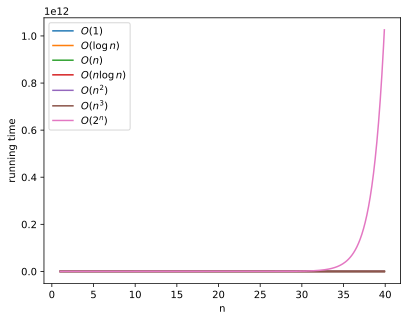

In [48]:
n = np.arange(1, 40, 0.1)

times = {
        r'$O(1)$': 0*n+1,
        r'$O(\log n)$': np.log(n),
        r'$O(n)$': n,
        r'$O(n \log n)$': n*np.log(n),
        r'$O(n^2)$': n**2.,
        r'$O(n^3)$': n**3.,
        r'$O(2^n)$':  2.**n
}

for name, t in times.items():
    plt.plot(n, t, label=name)
plt.legend()
plt.xlabel('n')
plt.ylabel('running time');

It is also common to look at log-log plots:

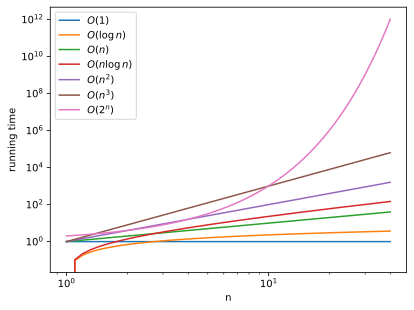

In [49]:
for name, t in times.items():
    plt.loglog(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

- Above: we see that $2^n$ (exponential) is by far the biggest! 
- Let's remove $2^n$ so we can see the rest of the log-log plot more clearly:

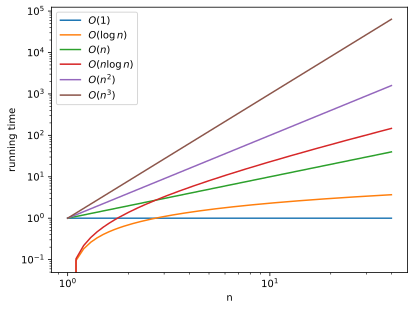

In [50]:
for name, t in times.items():
    if name != '$O(2^n)$':
        plt.loglog(n, t, label=name)
plt.legend();
plt.xlabel('n');
plt.ylabel('running time');

In log-log plots, polynomials turn into straight lines, with slope equal to the exponent.

## Example Big O analysis (10 min)

Find the time complexities of `f` and `g` below.

In [3]:
def f(n):
    for i in range(n):
        for j in range(n):
            print(i, j)

$O(n^2)$

In [ ]:
def g(n):
    for i in range(n):
        print(i)
    for j in range(n):
        print(j)

$O(n)$

#### How to determine the complexity?

- With raw Python code, we can often "count the number of loops"
  - A loop $n$ times gives $O(n)$
  - A nested loop gives $O(n^2$)
  - etc.
- However, we have to think about the functions we're using. 

#### What factors affect the runtime?

- What affects the Big O?
  - Typically, just the algorithm.
- What affects the constant?
  - The algorithm.
    - Does it take $n$ steps or $2n$ steps or $100000n$ steps?
    - How complicated is each step?
  - The _implementation_.
    - How fast is your programming language?
    - How fast are your libraries (e.g. Numpy)?
    - How fast is your laptop?
    - Is there an opportunity for parallel computation?
- The implementation issues are quite complicated. 
  - More on this later.

## Lower order terms revisited (10 min)

Why is $O(n+\log(n)+5)$ considered the same as $O(n)$?


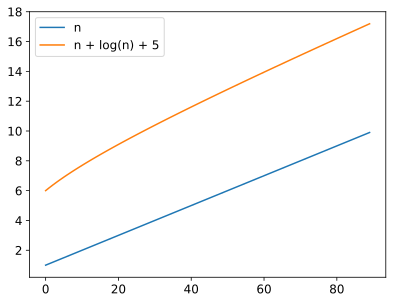

In [11]:
n = np.arange(1,10, 0.1)
plt.plot(n, label="n")
plt.plot(n+np.log(n)+5, label="n + log(n) + 5")
plt.legend();

- What you can see here is that $n+\log(n)+5$ starts curved but soon becomes linear-looking.
- We call the $\log(n)$ and the $5$ "lower order terms" because the grow more slowly than the dominant term ($n$).

#### For small n, the lower-order terms matter

- Consider an algorithm that takes $100\sqrt{n}$ steps vs. an algorithm that takes $n$ steps.
- According to big O, the second one is a faster-growing function, meaning the code will be slower.
- Let's plot it:

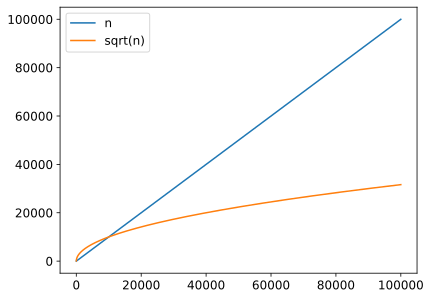

In [12]:
n = np.arange(1,100000)
plt.plot(n, label="n")
plt.plot(100*np.sqrt(n), label="sqrt(n)")
plt.legend();

- That seems to be true, $n$ grows faster than $\sqrt{n}$.
- But what if we zoom in:

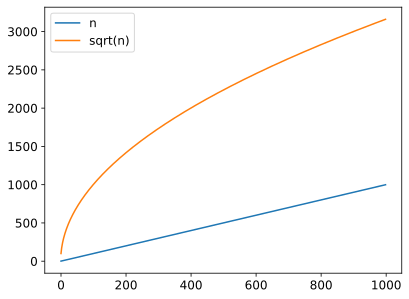

In [13]:
n = np.arange(1,1000)
plt.plot(n, label="n")
plt.plot(100*np.sqrt(n), label="sqrt(n)")
plt.legend();

- Actually, at first, the $100\sqrt{n}$ algorithm is slower! 
- So, we can't ignore the lower order terms all the time, we can just ignore them for large $n$.
- Big O analysis isn't the be-all and end-all. It's just often useful.

#### Addition vs. multiplication

- How is $n+\log(n)$ different from $n\log(n)$
- The first is $O(n)$, what about the second?

<br><br><br><br>

- The second is $O(n\log(n))$. 
- In Big O analysis, we keep the biggest **term**. 
  - Where "terms" are things being added together (not multiplied!)
- In the first case, the biggest term is $n$.
- In the second case, the biggest (and only) term is $n \log(n)$.

<br><br><br>

## Big O with two variables (5 min)

Consider this code:

In [ ]:
def fun(n,m):
    for i in range(n):
        for j in range(m):
            print("Hello")

What is the time complexity?

- The time complexity here is $O(nm)$. 

- If $m=n$  then it would be $O(n^2)$. 
- Note that everything should be combined in one big O 
  - it should be $O(nm)$ and not $O(n)O(m)$. 
- Likewise with addition, one would write $O(n+m)$ and not $O(n)+O(m)$.
- $O(nm+m)$ would be just $O(nm)$
  - $nm+m=(n+1)m$ and we don't make a distinction between $n$ and $n+1$
- $O(n^2+n+m)$ would be just $O(n^2+m)$
- $O(n^2+nm + m)$ would be $O(n^2+nm)$. We can't throw away either term because we don't know which will end up being the "dominant" factor.

- Example: in DSCI 571 you have datasets with $n$ rows and $d$ columns.

- How long does `fit()` take for a decision tree? 
- At least $O(nd)$ because that's how long it takes to look at the dataset.
  - Actually it takes longer than this!
  - But decision tree is a bit harder to analyze than some classifiers you'll learn next week.
  - The actual runtime is something like $O(mnd \log n)$ for a depth-$m$ tree.

## Worst/best/average cases (5 min, time-permitting)

Consider this code:

In [14]:
def find_0(x):
    for x_i in x:
        if x_i == 0:
            return True
    return False

- If $n$ is the length of `x`, the runtime here is $O(n)$.

- But is it always? What if we know `x[0]` is always 0, for any $n$? Then it's $O(1)$.
- What if the $0$ could be anywhere? Then it's $n/2$ on average which is $O(n)$.
- Sometimes algorithms have different _best case_, _worst case_ and _average case_ runtimes.
- In this course we won't go into this distinction. We're generally referring to the average case, which often is the same complexity as the worst cases anyway when you're concerned with the asymptotic behaviour.

## Space complexity (10 min)

- If code takes too long to run, that might be a problem.
- Another possible problem is running out of memory.
  - Note: this is NOT the same as "disk space".

In [15]:
import psutil
psutil.virtual_memory()

svmem(total=17179869184, available=9806512128, percent=42.9, used=6163693568, free=5568282624, active=4249960448, inactive=4081385472, wired=1913733120)

- Apparently I have about 16 GB of RAM.

- A number typically takes up 8 bytes, so I can store around 2 billion numbers.
  - Actually less, because I have other stuff going on, not just Python.
  - Plus, there's overhead from within Python.
- If my code needs to store 2 billion numbers _at the same time_, I can't run it on my laptop. 
- We also analyze space complexity using Big O notation.


- With _time complexity_, we tend to think more about the _algorithms_.
- With _space complexity_, we tend to think more about the _data structures_.



Example 1:

```python
x = np.zeros(n)
```

<br><br><br>
<br><br><br>
Space complexity: $O(n)$



Example 2:

```python
x = np.zeros((n,n))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Example 3:

```python
x = zeros((n,n,5))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Example 4:

```python
x = zeros((n,n,n))
```

<br><br><br>
<br><br><br>
Space complexity: $O(n^3)$

In [16]:
x = np.zeros((3,3,3))

In [17]:
x.shape

(3, 3, 3)

In [18]:
x.size

27

In [ ]:
np.prod(x.shape)

Example 5:

```python
x = np.zeros(5)
```

<br><br><br>
<br><br><br>
Space complexity: $O(1)$



Example 6 (time permitting): 

You have $n$ users on your social network site, and you want to store a "level of friendship" between every pair of users.

<br><br><br>
<br><br><br>
Space complexity: $O(n^2)$



Example 7 (time permitting):

You have $n$ users on your social network site, and you want to store who is friends with who.

<br><br><br>
<br><br><br>
Space complexity: it depends! If each user only has a constant (independent of $n$) number of friends, then $O(n)$. But in the worst case it could be $O(n^2)$. 

More on this in week 3!

Subtlety about space complexity:

In [19]:
range(5)

range(0, 5)

In [20]:
list(range(5))

[0, 1, 2, 3, 4]

In [21]:
np.arange(5)

array([0, 1, 2, 3, 4])

#### (optional) Extra memory stuff

In [22]:
psutil.virtual_memory()

svmem(total=17179869184, available=8940896256, percent=48.0, used=6995886080, free=3991781376, active=5073731584, inactive=4754341888, wired=1922154496)

In [23]:
x = np.random.rand(1_000_000_000)

In [24]:
psutil.virtual_memory()

svmem(total=17179869184, available=2970533888, percent=82.7, used=4822302720, free=70909952, active=2916319232, inactive=2899116032, wired=1905983488)

In [25]:
x.nbytes

8000000000

In [26]:
from sys import getsizeof

In [27]:
getsizeof(x)

8000000112

In [28]:
x = np.random.rand(3_000_000_000)

In [29]:
x.nbytes

24000000000

In [30]:
psutil.virtual_memory()

svmem(total=17179869184, available=3991044096, percent=76.8, used=3831873536, free=2189361152, active=1804959744, inactive=1756790784, wired=2026913792)

In [ ]:
x.shape

It seems that I'm able to create a 24 GB numpy array with only 16 GB of RAM on my machine. This is most likely due to the availability of [_swap_ memory](https://linuxhint.com/swap_memory_linux/), where data in the RAM are written to the hard drive to make room for extra data when the RAM is nearly full.